In [1]:
import datetime
import numpy as np
from binance.client import Client

import matplotlib.pyplot as plt
from config import *

In [2]:
client = Client(api_key, api_secret)

In [5]:
price = client.futures_mark_price(symbol='BTCUSDT')
price

{'symbol': 'BTCUSDT',
 'markPrice': '45256.58968637',
 'indexPrice': '45253.79605012',
 'estimatedSettlePrice': '45272.96596554',
 'lastFundingRate': '0.00010000',
 'interestRate': '0.00010000',
 'nextFundingTime': 1631433600000,
 'time': 1631415821005}

In [36]:
# client.futures_adl_quantile_estimate?
client.futures_change_leverage?
client.futures_create_order?
client.futures_leverage_bracket?
client.futures_order_book?
client.futures_time()

In [37]:
client.futures_coin_klines?
client.futures_continous_klines?
client.futures_historical_klines?
client.futures_klines?

In [87]:
client.futures_historical_klines?

In [113]:
datetime.datetime.fromtimestamp(1631387940000/1000.0).ctime()

'Sat Sep 11 14:19:00 2021'

In [ ]:
client.KLINE_INTERVAL_1MINUTE

In [114]:
datetime.datetime.fromtimestamp(1631388000000/1000.0).ctime()

'Sat Sep 11 14:20:00 2021'

In [71]:
datetime.datetime.fromtimestamp(1631371560000/1000.0).ctime()

'Sat Sep 11 09:46:00 2021'

In [170]:
L = client.futures_historical_klines(symbol='BTCUSDT',
                      interval=client.KLINE_INTERVAL_5MINUTE,
                      start_str='2021-09-07 22:00:00',
                      end_str='2021-09-12 09:00:00',
                      limit=1500)
len(L)
# L = client.futures_klines(symbol='BTCUSDT',
#                       interval=client.KLINE_INTERVAL_1MINUTE,
#                       start_str='2021:09/10',
#                       limit=1500)
# len(L)

1285

In [171]:
print(L[0])

[1631052000000, '46566.33', '46566.33', '46328.75', '46507.14', '1001.600', 1631052299999, '46506935.28937', 12784, '469.803', '21813686.03598', '0']


1285


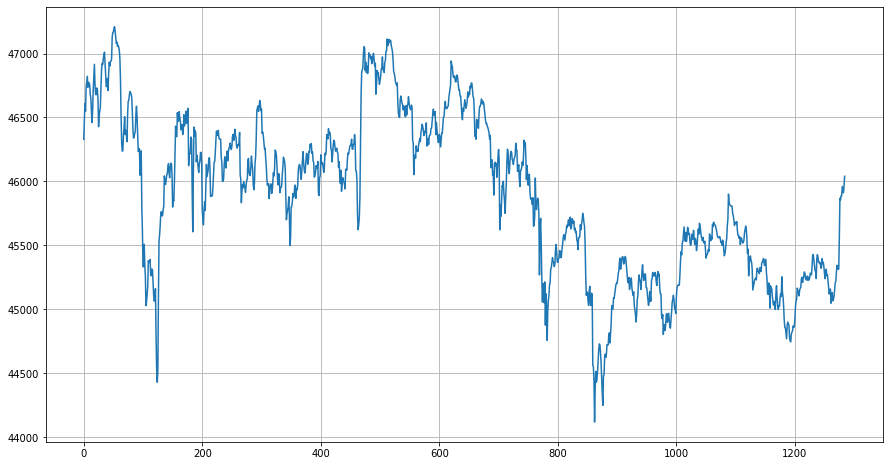

In [173]:
arr = np.array(L, dtype=np.float)
M = arr[:, 3]
H = arr[:, 1]
Lo = arr[:, 2]
shape = M.shape[0]
print(shape)

fig = plt.figure(figsize=(15, 8))
plt.plot(M)
# plt.plot(H)
# plt.plot(Lo)
plt.grid()
plt.show()

1285


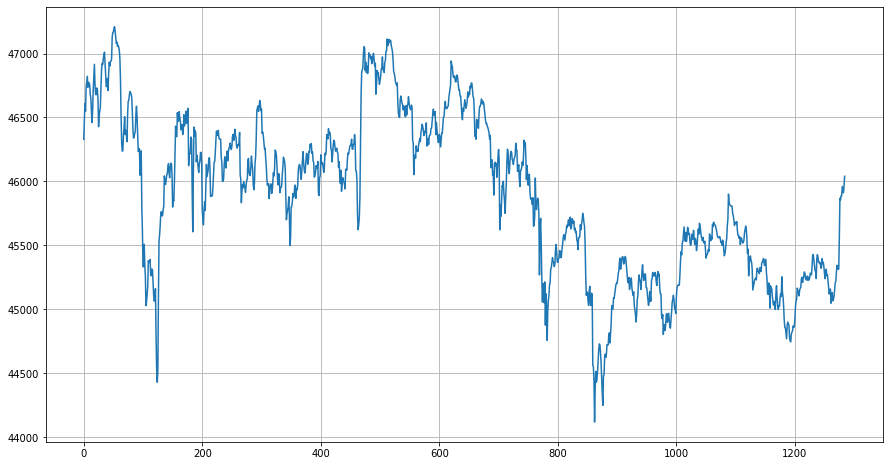

In [174]:
fig = plt.figure(figsize=(15, 8))
# interv = M[270:1370]
interv = M.copy()
print(len(interv))
len(interv)
plt.plot(interv)
plt.grid()
plt.show()

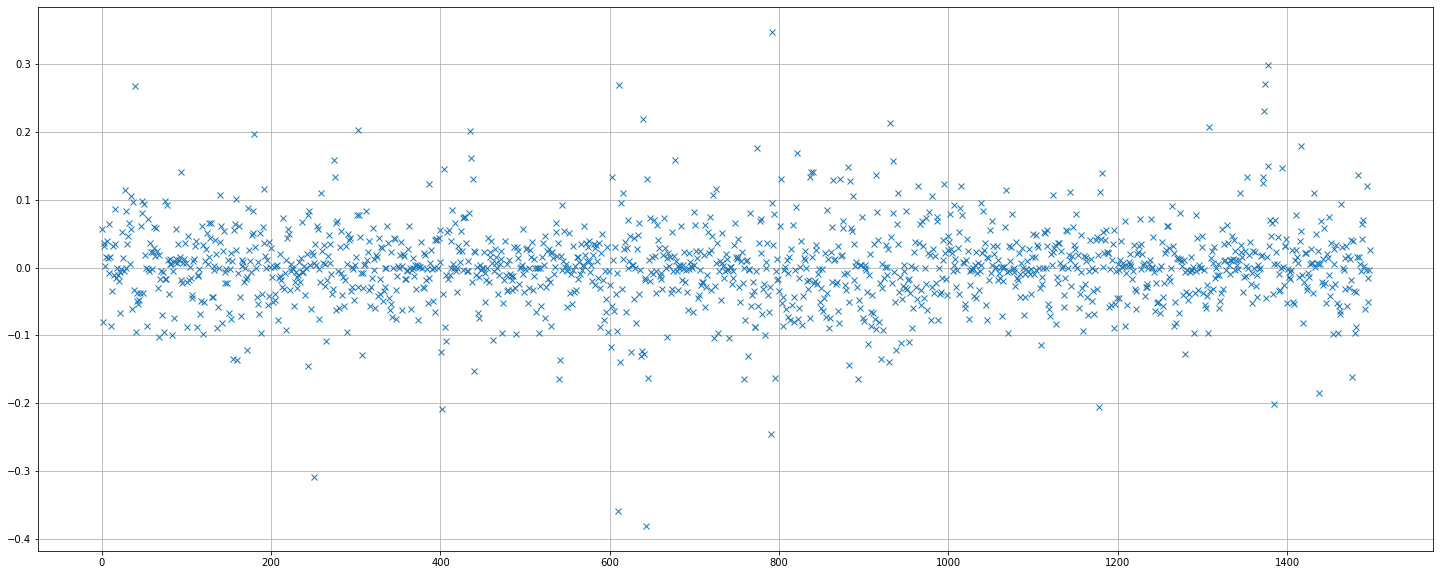

In [179]:
V = np.array(V)
fig = plt.figure(figsize=(25, 10))
plt.plot(V[:, 0], "x")
# plt.plot(V[:, 1])
# plt.plot(V[:, 2])
plt.grid()
plt.show()

In [162]:
U = []
paraIter = interv[:-1].copy()
for i, n in enumerate(paraIter):
    v1 = M[i]
    v2 = M[i+1]
    diff = 100*(v2-v1)/v1
    U.append(diff)
len(U)

1099

In [174]:
V = []
paraIter = M[:-1].copy()
for i, n in enumerate(paraIter):
    l = []
    v1 = M[i]
    v2 = M[i+1]
    diff = 100*(v2-v1)/v1
    l.append(diff)
    
    v1 = H[i]
    v2 = H[i+1]
    diff = 100*(v2-v1)/v1
    l.append(diff)
    
    v1 = Lo[i]
    v2 = Lo[i+1]
    diff = 100*(v2-v1)/v1
    l.append(diff)
    V.append(l)
    
len(V)

1499

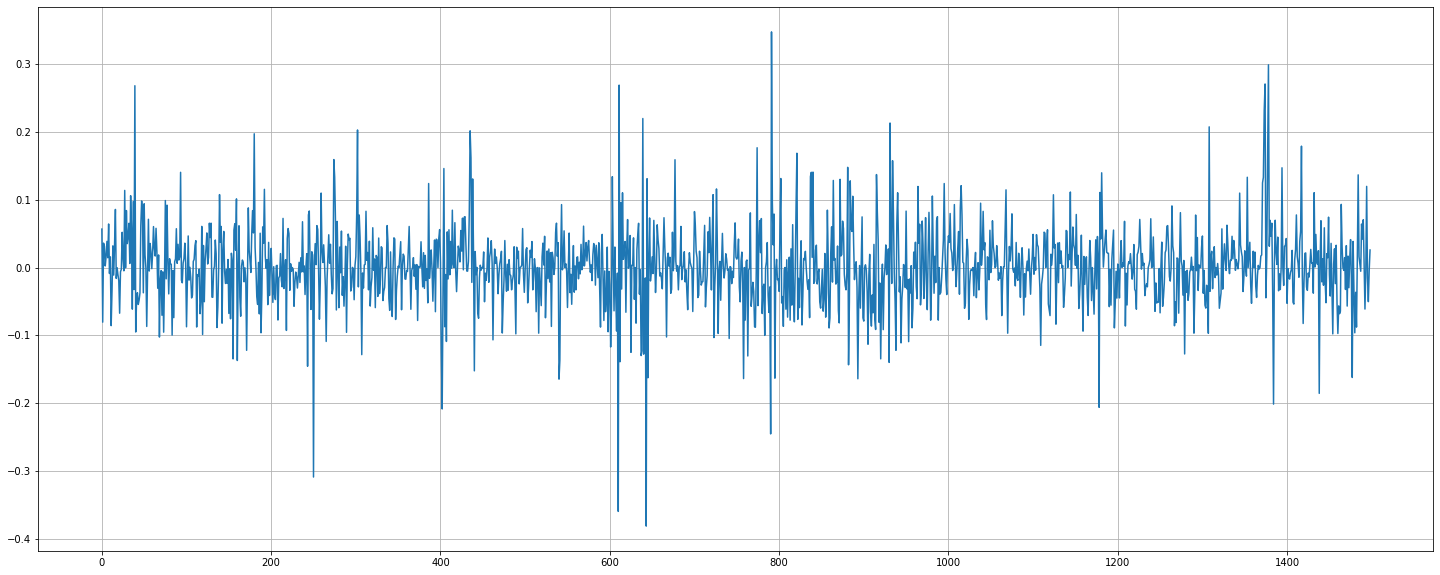

In [187]:
V = np.array(V)
fig = plt.figure(figsize=(25, 10))
plt.plot(V[:, 0])
# plt.plot(V[:, 0], "X")
# plt.plot(V[:, 1])
# plt.plot(V[:, 2])
plt.grid()
plt.show()

1100


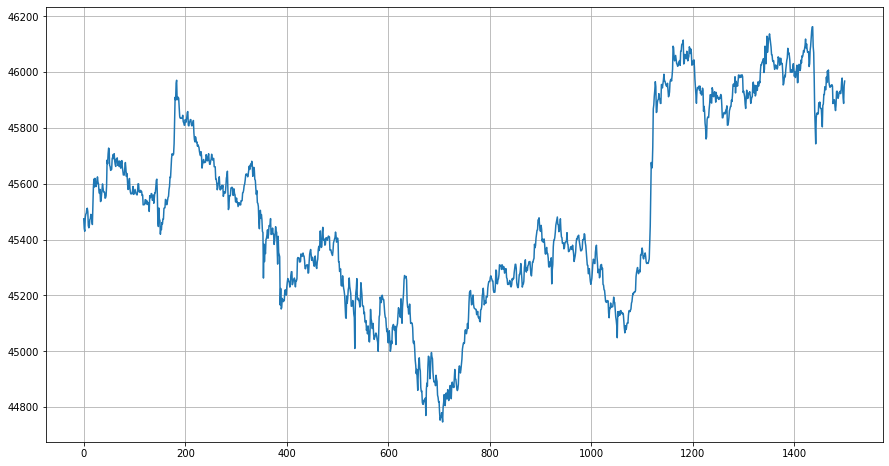

In [219]:
fig = plt.figure(figsize=(15, 8))
interv = M[270:1370]
print(len(interv))
len(interv)
plt.plot(M)
plt.grid()
plt.show()

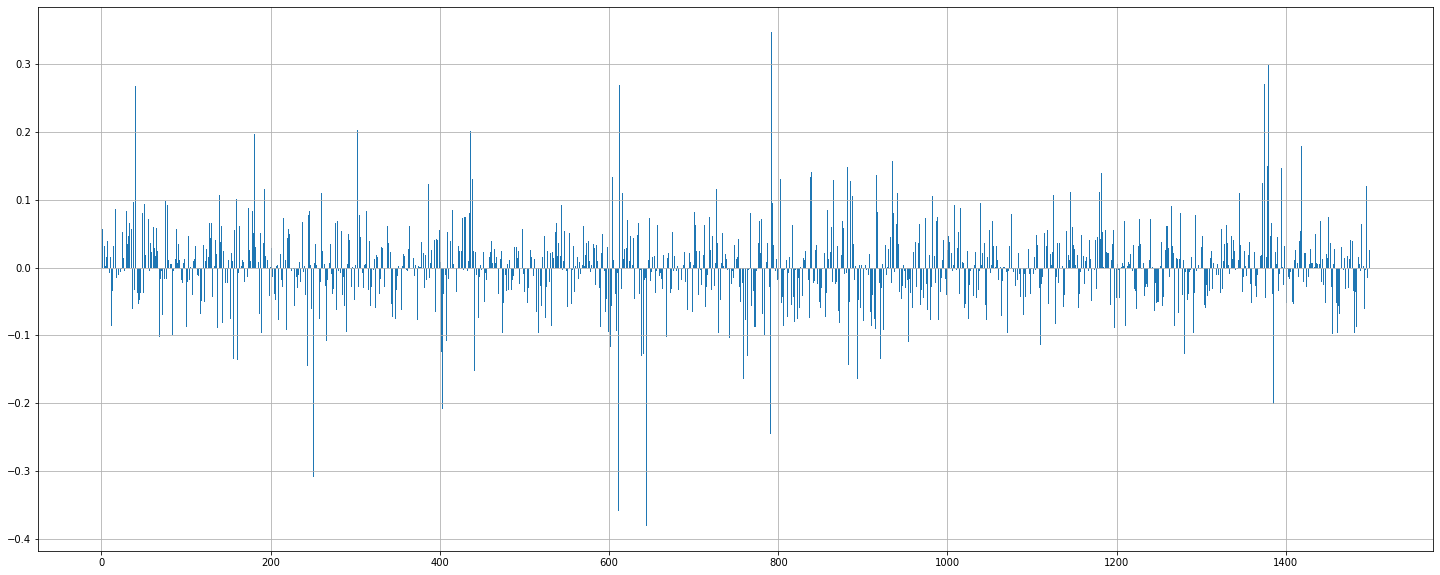

In [186]:
V = np.array(V)
fig = plt.figure(figsize=(25, 10))
arr_v = V[:, 0]
inds = [i+1 for i in range(len(arr_v))]
# plt.plot(arr_v, "X")
plt.bar(inds, arr_v)
# plt.plot(V[:, 1], "X")
# plt.plot(V[:, 2], "X")
plt.grid()
plt.show()

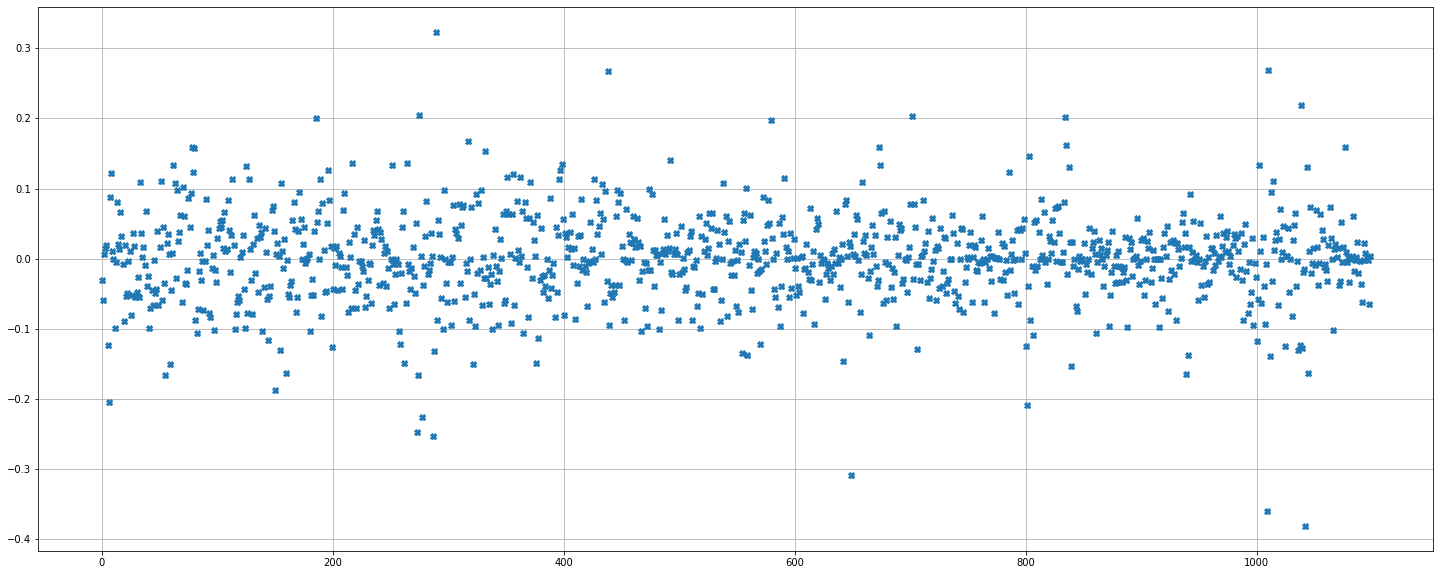

In [218]:
fig = plt.figure(figsize=(25, 10))
plt.plot(U, "X")
plt.grid()
plt.show()